# RAMP AQ Data

RAMP AQ data from the WFRT rooftop is read in with the function below..

100% [........................................................] 350692 / 350692

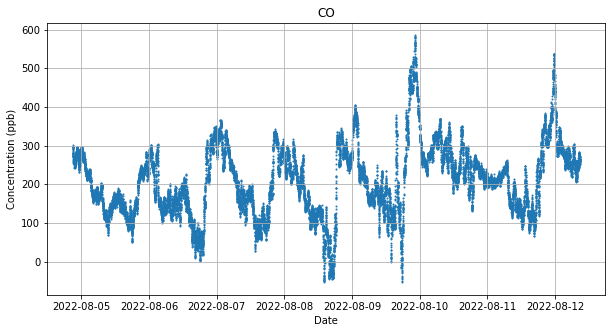

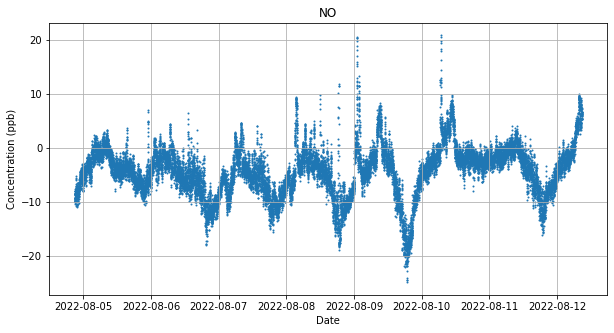

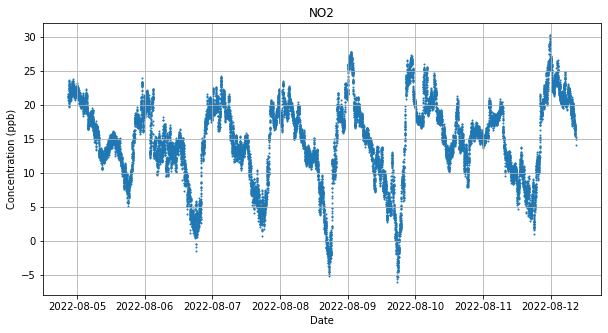

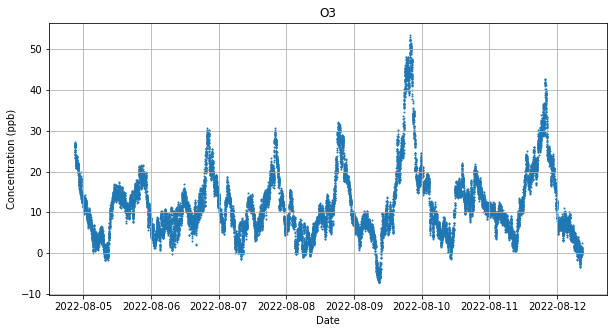

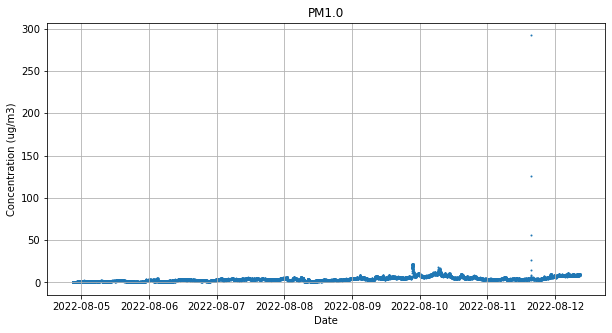

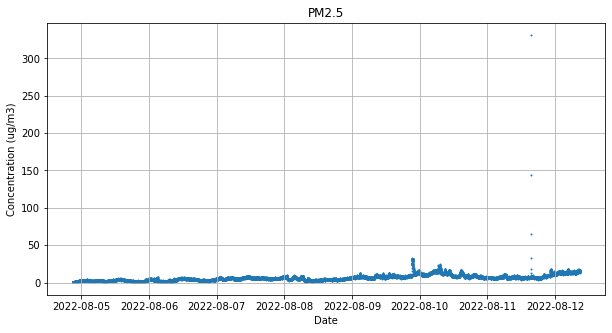

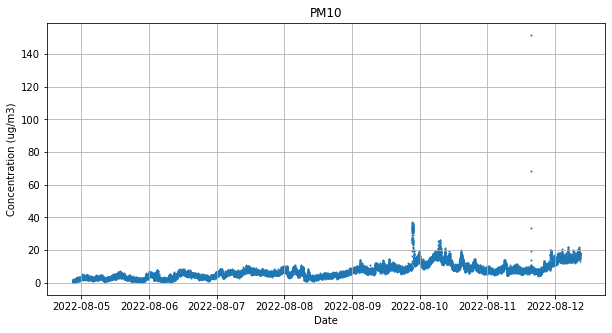

In [1]:
from func import run

run()